## Multiple Linear Regression

### y = b_0 + b_1 * x_1 + b_2 * x_2 + ... + b_n * x_n

*test*
~test~


## Assumptions of a Linear Regression

### 1.Linearity
### 2.Homoscedasticity
### 3.Multivariate Normality
### 4.Independence of Errors
### 5.Lack of Multicollinearity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### How can we add State (a categorical variable) into our linear equation ?
Create dummy variables

#### y = b0 + b1 x1 + b2 x2 + b3 x3 + b4 D1 
## To avoid multicollinearity, always use n-1 dummy variables (provided you have n dummy variables)

# 5 methods of building models:

## 1. All-in
## 2. Backward Elimination
## 3. Forward Selection
## 4. Bidirectional Elimination
## 5. Score Comparison

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[: , -1].values

In [5]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder_X = LabelEncoder()  #takes no parameters
X[:, 3] = label_encoder_X.fit_transform(X[:, 3])





In [7]:
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [8]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [9]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [10]:
# avoid multicollinearity

X = X[:, 1:]

In [11]:
#importing the library to split the dataset into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#fitting multiple linear regression to training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
regressor.

In [14]:
#predicting the test set results
y_pred = regressor.predict(X_test)

In [15]:
pd.DataFrame({'test' : y_test, 'pred' : y_pred , 'diff' : y_pred-y_test})

,test,pred,diff
0,103282.38,103015.201598,-267.178402
1,144259.40,132582.277608,-11677.122392
2,146121.95,132447.738452,-13674.211548
3,77798.83,71976.098513,-5822.731487
4,191050.39,178537.482211,-12512.907789
5,105008.31,116161.242302,11152.932302
6,81229.06,67851.692097,-13377.367903
7,97483.56,98791.733747,1308.173747
8,110352.25,113969.435330,3617.185330
9,166187.94,167921.065696,1733.125696


In [20]:
import scipy.stats as stats
stats.probplot()

<function seaborn.categorical.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [37]:
order=np.argsort(X_test[:,2])


In [40]:

X_test[:,2][order]

array([ 20229.59,  27892.92,  61136.38,  66051.52,  72107.6 ,  73994.56,
       100671.96, 101913.08, 142107.34, 153441.51])

Text(0,0.5,'Profit')

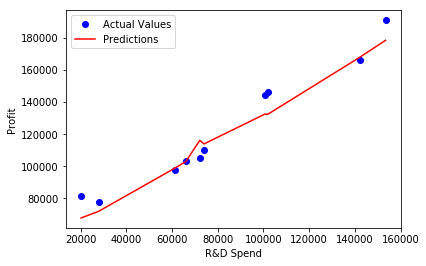

In [42]:
plt.plot(X_test[:,2],y_test,"bo",label="Actual Values")
plt.plot(X_test[:,2][order],y_pred[order],"red",label="Predictions")
plt.legend()
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

In [62]:
regressor.score(X_test,y_test)

0.9347068473282989

In [46]:
#Buildding the optimal model using Backward Elimination
import statsmodels.formula.api as sm

In [47]:
#we need to add a column of ones
#statsmodels.api doesn't take into account the b_0 constant
#now we're gonna calcualte p-values

X = np.append(X, np.ones([X.shape[0],1]), axis=1)

In [48]:
X[: , 5] = X[: , 5].astype('int')

In [49]:
X = X.astype('int')

In [50]:
X.dtype

dtype('int32')

In [51]:
#optimal matrix only contain variable that impact outcome
X_opt = X[:, [0,1,2,3,4,5]]
#select a SL

In [54]:
X_opt.shape

(50, 6)

In [55]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [56]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           1.34e-27
Time:                        15:54:33   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           198.7542   3371.026      0.059      0.953   -6595.103    6992.611
x2           -42.0063   3256.058     -0.013      0.990   -6604.161    6520.148
x3             0.8060      0.046     17.368      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
const       5.013e+04   6884.855      7.281      0.000    3.63e+04     6.4e+04
==============================================================================
Omnibus:                       14.783   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.267
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#let's remove the iv with the highest p-value
X_opt = X[:, [0,2,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           8.49e-29
Time:                        16:02:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           220.1847   2900.553      0.076      0.940   -5621.828    6062.197
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
const       5.011e+04   6647.901      7.537      0.000    3.67e+04    6.35e+04
==============================================================================
Omnibus:                       14.759   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.173
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#let's remove the iv with the highest p-value
X_opt = X[:, [2,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           4.53e-30
Time:                        16:04:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
const       5.012e+04   6572.384      7.626      0.000    3.69e+04    6.34e+04
==============================================================================
Omnibus:                       14.839   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.443
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.587   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
#let's remove the iv with the highest p-value
X_opt = X[:, [2,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           2.16e-31
Time:                        16:04:25   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7966      0.041     19.265      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
const       4.698e+04   2689.941     17.464      0.000    4.16e+04    5.24e+04
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.162
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
#let's remove the iv with the highest p-value
X_opt = X[:, [2,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           3.50e-32
Time:                        05:24:53   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8543      0.029     29.151      0.000       0.795       0.913
const       4.903e+04   2537.900     19.320      0.000    4.39e+04    5.41e+04
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.538
Skew:                          -0.911   Prob(JB):                     9.43e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
#Backward Elimination with p-values only
#automatic implementation

'''
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)
'''

'\nimport statsmodels.formula.api as sm\ndef backwardElimination(x, sl):\n    numVars = len(x[0])\n    for i in range(0, numVars):\n        regressor_OLS = sm.OLS(y, x).fit()\n        maxVar = max(regressor_OLS.pvalues).astype(float)\n        if maxVar > sl:\n            for j in range(0, numVars - i):\n                if (regressor_OLS.pvalues[j].astype(float) == maxVar):\n                    x = np.delete(x, j, 1)\n    regressor_OLS.summary()\n    return x\n \nSL = 0.05\nX_opt = X[:, [0, 1, 2, 3, 4, 5]]\nX_Modeled = backwardElimination(X_opt, SL)\n'

In [ ]:
#Backward Elimination with p-values and Adjusted R Squared:

'''
import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)
'''

In [67]:
X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(X_opt, y, test_size=0.2, random_state=0 )

In [68]:
regressor_OLS = regressor.fit(X_opt_train, y_opt_train)

In [69]:
y_opt_pred = regressor_OLS.predict(X_opt_test)

In [70]:
pd.DataFrame({'actual' : y_test, 'nonoptimal model' : y_pred, 'optimal model' : y_opt_pred})

,actual,nonoptimal model,optimal model
0,103282.38,103015.201598,102284.623678
1,144259.40,132582.277608,133873.553047
2,146121.95,132447.738452,134182.460110
3,77798.83,71976.098513,73700.740953
4,191050.39,178537.482211,180642.252740
5,105008.31,116161.242302,114717.144839
6,81229.06,67851.692097,68334.987534
7,97483.56,98791.733747,97433.544894
8,110352.25,113969.435330,114580.867334
9,166187.94,167921.065696,170343.454242


In [75]:
regressor_OLS.score(X_opt_test,y_opt_test)

0.9474383133374407